# Calculo matricial

**La Derivada de una matriz**: Sea $A=A(x)$, $x \in \mathbb{R}^p$, $A \in \mathbb{R}^{m \times n}$.

La derivada de $A$ con respecto a la componente $x_k$  (gradiente)
 se define como


$$\frac{\partial{A}}{\partial x_k} = \left [ \frac{a_{ij}}{\partial x_k} \right ] \quad , k=1,2, \cdots , p \quad , \quad i=1,2, \cdots m, \quad , \quad j=1,2, \cdots n$$

Propiedades importantes del calculo matricial.

* Si $A$ es constante  
$$ \frac{\partial A}{\partial x_k} = 0 $$

Prueba:

$$ \frac{\partial A}{\partial x_k} = \left [ \frac{\partial A}{\partial x_k} \right ] =[0] = 0$$


* Si $A$ es $m \times n$ , $x \in \mathbb{R}^n$ entonces

$$\nabla (A x) = x $$

Prueba: La componente $i$ de $Ax$ esta dada por:

$$ y_i = \sum_{j=1}^n a_{ij} x_j $$

De forma que

$$ \frac{\partial y_i}{\partial x_k} = \sum_{j=1}^n a_{ij} \frac{\partial x_j}{\partial x_k} = \sum_{j=1}^n a_{ij} \delta_{jk} = a_{ik} $$
De forma que $\nabla Ax = A$.

* Asuma $f(x)$, $g(x)$ funciones vectoriales de un vector $x$. Entonces

$$ \frac{\partial \langle f, g \rangle }{\partial x_k} = \left \langle \frac{\partial f}{\partial x_k} , g \right \rangle  + \left \langle f, \frac{\partial g}{\partial x_k }\right \rangle \quad (1)$$

Prueba: $\langle f, g \rangle = \sum_{j=1}^n \overline{f_j(x)} g_j(x)$.

Entonces:

\begin{eqnarray}
\frac{\partial \langle f, g \rangle }{\partial x_k} &=& \frac{\partial }{\partial x_k}\sum_{j=1}^n \overline{f_j(x)} g_j(x) \\
&=& \sum_{j=1}^n \frac{\partial \overline{f_j(x)}}{\partial x_k} g_j(x) + \overline{f_j(x)} \frac{\partial g_j(x)}{\partial x_k}  \\
&=& \left \langle \frac{\partial f}{\partial x_k} , g \right \rangle + \left \langle f, \frac{\partial g}{\partial x_k }\right \rangle
\end{eqnarray}

Podemos decir que
$$\nabla \langle f, g \rangle = \langle \nabla f , g \rangle + \langle f, \nabla g \rangle  $$

Abusamos de la notacion por que $\nabla f$ es una matriz. No hemos definido el producto interno entre una matriz y un vector. Entonces realmente
lo queremos decir es la componente $k$ del gradiente.
$$[\nabla \langle f, g \rangle]_k = \langle [\nabla f]_k , g \rangle + \langle f, [\nabla g]_k \rangle  $$

Uno de los objetivos de esta sesion es minimos cuadrados.

* Ejemplo: sea $f(x) = \frac12 \| A x - b \|^2$
Encuentre $\nabla f$.

Solucion: 
$$ f(x) = \frac12 \langle Ax -b , Ax-b \rangle $$

Uso el teorema de arriba (1).

\begin{eqnarray}
\nabla_k f(x) &=& \frac12 \langle \nabla_k (Ax-b), Ax-b \rangle + \langle Ax-b, \nabla_k(Ax-b) \rangle \\
&=& \frac12 ( \langle A_k , Ax - b \rangle + \langle Ax-b, A_k \rangle ) \\
&=& \langle A_k, Ax - b \rangle 
\end{eqnarray}

De forma que
$$ \nabla f(x) = A^*( Ax - b)  $$.
Esto es interesante por que el problema de minimos cuadrados pide encontrar cuando el gradiente es 0.

Es decir $\nabla f = 0$ tenemos

$$ A^* (Ax - b) = 0$$
es decir
$$A^* Ax = A^* b$$

A estas se le llaman las ecuaciones normales.



## Regularizacion:
El problema que queremos resolver es $Ax=b$,
$A \in \mathbb{R}^{m \times n}$, $b \in \mathbb{R}^m$, $x \in \mathbb{R}^n$.  Si $A$ es invertible, simplemente

$$  x= A^{-1} b $$

Pero $A$ puede no ser cuadrada o siendo cuadrada no tener inversa.  Pueden pasar varias cosas:

* Que la matriz $A$ sea sobredeterminada. Es decir el sistema $Ax=b$ tiene mas ecuaciones linealmente independientes que incorgnitas. $2x=2 \\ 3x=4$

* Que la matriz $A$ sea subdeterminada. Es decir que el sistema $Ax=b$ tena menos ecuaciones linealmente independintes que incoginas. Ej: $2 x + 3 y = 5$.

En el primer problema no hay solucion. En el segundo hay un numero infinito de soluciones. Queremos garantizar una solucion.

Un metodo es mediante regularizacion.  Para esto se altera la funcion objetivo agregandole un penalti:

$$ f(x) = \frac12 \| Ax - b \|^2 + \| \Gamma x \|^2$$
Un ruso (Tikhonov). Minizar esta funcion recibe el nombre
de Tikhonov regularization. $\Gamma$ es una matrix positiva definida. Este problema tiene una solucion

$$ x= (A^* A + \Gamma^* \Gamma)^{-1} A^* b $$
De donde sale esto?

Las ecuaciones normales extendidas para este problema:

$$ (A^*A + \Gamma^* \Gamma) x = A^* b  $$



Otros nombres para Tikhonov regularization son Tikhonov-Miller method, Phillips-Twomey method. 

Es comun elegir $\Gamma= \sqrt{\lambda} I$ ($\lambda > 0$)
En este caso 

$$x = (A^* A + \lambda I)^{-1} A^* b $$.

En el mundo estadistico a esto se le llama Ridge Regression.

Nosotros pudimos haber llegado a esta ecuacion por un metodo heuristico como sigue:

* $A x= b$,  $A \in \mathbb{R}^{m \times n}$
* Multiplicamos a ambos lados por $A^*$ 

$$ A^* A x = A^* b$$ 
Si $A^* A$ es invertible, listo
$$ x = (A^* A)^{-1} b$$. 
Pero que pasa si $A^* A$ es singular (no invertible).
Esto pasa cuando las columnas de $A$ no son linealmente independientes. 

Corremos el espectro al lado positivo. Explico: Si $A^* A$ no es invertible algunos autovalores son 0. Entonces para "correrlos" sumamos $\lambda I$ y consideramos esta vez

$$ (A^* A + \lambda I) x = A^* b  $$
$\lambda > 0$. Si $\lambda$ es pequeno el problema es casi el mismo. Pero $\lambda$ puede ser grande. De hecho si $\lambda \gg 1$ entonces $x \to 0$. 


$$ x = (A^* A + \lambda I)^{-1} A^* b$$.

El problema de Ridge regression sale como la minizacion
de la funcion objetivo $J(x)$

$$ J(x) = \frac12 \| Ax - b \|^2 + \lambda \| x \|^2 $$

Otra forma de ver este problema es con  multiplicadores de Lagrange.

\begin{eqnarray}
\min_{x} \frac12 \| Ax - b \|^2 \\
\text{sujeto a la restriccion} \| x \|^2 \le c
\end{eqnarray}
donde $c>0$.





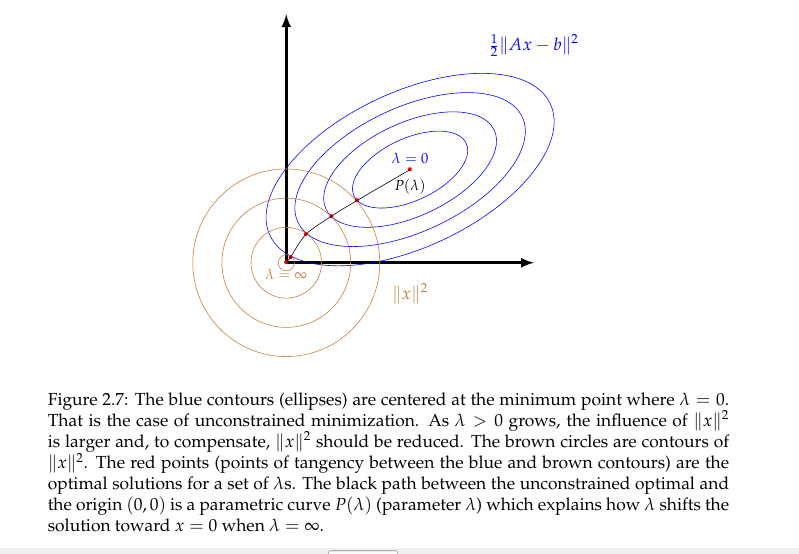

La regularizacion no es solo cuando $A$ no tenga inversa. Puede ser que $A$ tenga un condition number $\kappa=\sigma_r/\sigma_0$ (autovalores de $A^* A$ muy pequenos. Esto crea inestabilidad y al sisteam $Ax=b$ se le llama "ill-posed$ (mal condicionado). La regularizacion ayuda.



## La pseudo-inversa:

La introduzco con un ejemplo:

Resuelva

$$ 2 x_1 + 3 x_2 = 5$$
No hay una solucion unica. De hecho $x_1=1, x_2=1$ es una solucion, $x_1=0, x_2=5/3$. Escribamos este problema de forma matricial:

\begin{eqnarray}
A = (2  \quad 3 ) \\
x = (x_1 \quad x_2)^T  \\
b= 5 \\
Ax=b
\end{eqnarray}

Siguiendo el proceso explicado arriba hallemos $A^T A$.

$$ A^T A =  \begin{pmatrix} 2 \\ 3  \end{pmatrix} (2 \quad 3 ) = \begin{pmatrix} 4 & 6 \\ 6 & 9  \end{pmatrix}$$

Esta matriz no es invertible. El determinante es 0.
Como no es invertible existe un espacio nulo, no zero
Es decir existen vectores $x_0$ tales que $A x_0 = 0$.

Y el espacio de soluciones es $x=x_p + x_0$
por que?  $x_p$ es una solucion particular $A x_p = b$. 

$$ A x = A( x_p + x_0) = A x_p + A x_0 = b + 0 = b$$

Cual es el espacio nulo de $A$. Son los $x$ tales que $Ax=0$.

$$ 2 x_1 + 3 x_2 = 0$$



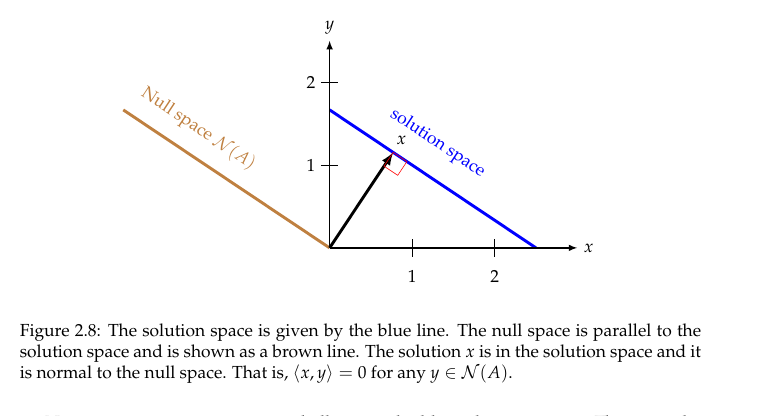

La ecuacion de la perpendicular al espacio nulo $2x_1 + 3x_2=0$ es $-3 x_1 + 2 x_2 = 0$.

Lo que debemos resolver son las siguientes dos ecuaciones:

\begin{eqnarray}
2 x_1 + 3 x_2 &=& 5 \\
-3 x_1 + 2 x_2 &=& 0
\end{eqnarray}
Multiplicamos la primera ecuacion por 3 y la segunda por 2 y sumamos.

$$ 13 x_2 = 15$$,
$x_2 = 15/13$.

Ahora para $x_1$. De la ecuacion homogenea

$$x_1 = 2 x_2/3 = 2 (15/13)/3 = 10/13 $$

La motivacion para la definicion de la matriz pseudoinversa.

Si existe una matriz $A^+$ tal que $x=A^+ b$ con la caracteristica de que $x$ es la solucion mas pequena.
Entonces esa matriz $A^+$ seria la pseudoinversa.

Cual matriz seria $A^+$?

\begin{eqnarray}
\begin{pmatrix} 10/13 \\ 15/13 \end{pmatrix} =  \begin{pmatrix}  y_1 \\ y_2 \end{pmatrix} 5 
\end{eqnarray}

quien es $y_1, y_2$.
De la ecuacion anterior es claro que $y_1=(10/13)/5$, $y_2=(15/13)/5 o sea simplicando

$$ A^+=
\begin{pmatrix} \frac{2}{13} \\ \frac{3}{13}  \end{pmatrix}
$$



Compliquemos un poco mas el problema. Agreguemos otra ecuacion

\begin{eqnarray}
2 x_1 + 3 x_2 = 5 \\
2 x_1 + 3 x_2 = 1 
\end{eqnarray}
Definamos

$$ A = 
\begin{pmatrix}
2 & 3 \\
2 & 3
\end{pmatrix}
$$ 
el vector 
$$ \begin{pmatrix} 5 \\ 1 \end{pmatrix}  $$

El problema $Ax = b$ no tiene solucion por que
$b \in \mathcal{R}(A)$.  El rango de $A$ , $\mathcal{R}(A)$
es el generado de las columnas $(2,2)^T$, $(3,3)^T$.
Es decir $\alpha (1, 1)$.


El vector $b \notin \mathcal{R}(A)$, lo proyectamos.
Como se proyecta un vector a una espacio. El espacio en este caso es una linea. Necesitamos representar el espacio por un vector unitario $u$.

La proyeccion de $x$ a $u$ es $\langle x, u \rangle u$.

$u=r/ \| r \|$, $r=(1,1)^T$ $u=(1,1)^T/\sqrt{2}$ es decir, 
como $1/\sqrt{2}  = \sqrt{2}/2$. $b=(5,1)^T$.

La proyeccion:
$$ b_r = \left \langle   \begin{pmatrix} 5 \\ 1 \end{pmatrix}  , \begin{pmatrix} \sqrt{2}/2 \\ \sqrt{2} / 2 \end{pmatrix}  \right \rangle  \begin{pmatrix} \sqrt{2}/2 \\ \sqrt{2} / 2 \end{pmatrix}   = \begin{pmatrix} 3 \\ 3 \end{pmatrix} $$

$b=b_r + b_0$ donde $b_0$ es ortogonal a $b_r$, $b_0 \perp b_r$. 
(teorema de Pitagoras).

$$ \| b \|^2 = \| b_r \|^2 + \| b_0 \|^2 $$


Voy a probar que $\min_x \| Ax - b \|^2 = \|  b_0 \|^2 $

Graficamente se ve con la siguiente ilustracion



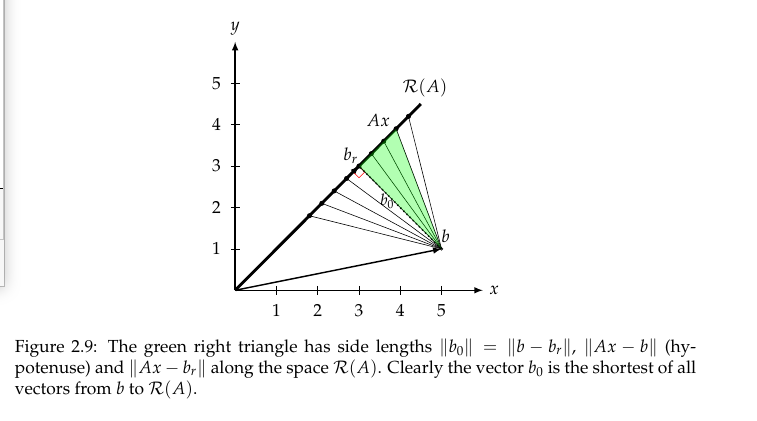


$b = b_r + b_0 $
\begin{eqnarray}
\| Ax - b \|^2 &=& \langle Ax - b , Ax - b \rangle \\
&=& \langle Ax -b_r - b_0,  Ax - b_r - b_0 \rangle \\
&=& \langle (Ax - b_r) - b_0, (Ax - b_r) - b_0 \rangle \\
&=& \| Ax - b_r \|^2 - 2 \langle Ax - b_r, b_0 \rangle + \| b_0 \|^2  \\
&=& \| Ax - b_r \|^2 + \| b_0 \|^2
\end{eqnarray}
El minimo ocurre cuando $\| Ax - b_r \|^2 = 0$,
es decir cuando $\| Ax - b \| = \| b_0 \|$

El problema que tiene solucion es $Ax = b_r$
donde $b_r=(3,3)^T$.

El problema es

\begin{eqnarray}
2 x_1 + 3 x_2 = 3 \\
2 x_1 + 3 x_2 = 3
\end{eqnarray}

Este problema si tiene solucion. En este momento tenemos
solo la ecuacion $2 x_1 + 3 x_2 = 3$.
Esta ecuacion tiene un numero infinito de soluciones. La mas pequena de todas es la que es normal al espacio nulo.
El espacio nulo satisface la ecuacion
$2 x_1 + 3 x_2 = 0$. La pendiente $m_1=-2/3$ el espacio nulo tiene pendinte $m_2=3/2$ o seas $x_2 = 3 x_1/2$,

$-3 x_1 + 2 x_2 = 0$.

Ahora combinamos las dos ecuaciones:

\begin{eqnarray}
2 x_1 + 3 x_2 &=& 3 \\
-3 x_1 + 2 x_0 &=& 0 
\end{eqnarray}


La solucion $x_1=18/39$, $x_2 = 9/13$.


Recapitulemos un poco: Queremos resolver $Ax = b$.
En general la inversa de $A$ no existe.
Podemos pensar en minimos cuadrados encontrando el $x$ que miniza a $\| Ax - b \|^2$. Tenemos que $b = b_r + b_0$
donde $b_r \in \mathcal{R}(A)$, $b_0 \perp \mathcal{R}(A)$. 
Usando el teorema de Pitagoras

$$ \| A x - b \|^2 = \| Ax - b_r \|^2 + \| b_0 \|^2 $$

Ahora bien, observe las siguientes equivalencias:
Como $b_0$ es ortogonal a $\mathcal{R}(A)$, 
$0 = \langle b_0, Ax \rangle = \langle A^* b_0, x \rangle $
para todo $x$. O sea $A^* b_0 = 0$. 

que $b_0 \in \mathcal{N}(A^*)$


\begin{eqnarray}
Ax = b_r &\Longleftrightarrow& Ax = b - b_0 \\
&⟺& Ax - b \in \mathcal{N}(A^*) \\
&⟺& A^*(Ax - b) = 0 \\
&⟺& A^* A x = A^* b
\end{eqnarray}
Estas son las ecuaciones normales. Entonces es intersante observar que el problema de proyectar $b$ al rango de a $A$ 
como $b=b_r + b_0$ es equivalente al problema de minimos cuadrados (de las ecuaciones normales).

Si $A^*A$ tiene inverso tenemos que

$$ x = (A^* A)^{-1} A^* b$$.
Sin embargo, si las columnas de $A$ no son linealmente independientes no existe la inversa de $A^* A$. 
Existe un vector $x_{N} \in \mathcal{N}$ tal que
$A x_{N} = 0$. Tomemos una solucion arbitraria estas
es la suma de una particular mas $x_{N}$.
Es decir $x = x_p + x_{N}$. La magnitud de $x$ mas pequena
se da cuando es ortogonal al espacio nulo.  $x_p \perp \mathcal{N}(A)$. 





Definir la pseudoinversa: Si existe una matriz $A^+$ tal que
$x= A^+ b$, que resuelva el problema de minimos cuadrados:

1. La proyecccion de $b$ al rango $\mathcal{R}(A)$. Es decir
las ecuaciones normales $A^*A x = A^* b$ es equivalente a que
$A x = b_r$, donde $b_r$ es la proyeccion de $b$ al rango de $A$.

2. $x \perp \mathcal{N}(A)$. Es decir $\langle x, w \rangle = 0$, $\forall w \in \mathcal{N}(A)$. 

Decimos que $A^+$ es la pseudoinversa de $A$.




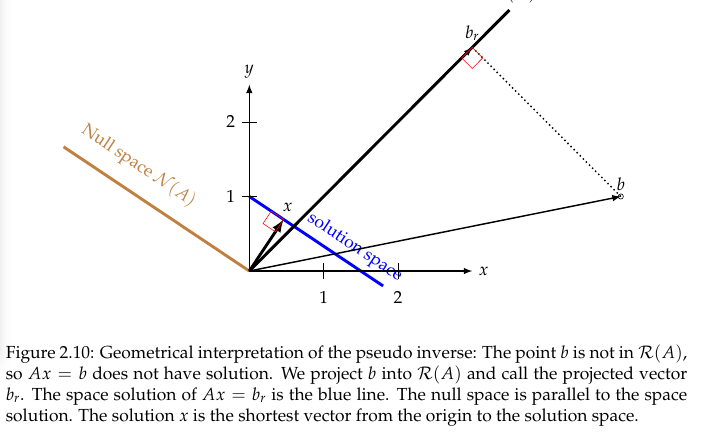

En las notas de clase tenemos este ejemplo:
 Considere $A=(2,3)$, y $b=5$, queremos resolver el problema
 $Ax = b$.

 En las notas se resuelve:

 La solucion para $x$ es


 $$ \begin{pmatrix}x_1 \\ x_2  \end{pmatrix} = \begin{pmatrix}  \frac{10}{13} \\ \frac{15}{13} \end{pmatrix}
 = A^+ b = 5 A^+$$

 De aca sale

 $$ A^+ = \begin{pmatrix} \frac{2}{13} \\ \frac{3}{13}  \end{pmatrix}$$

In [1]:
## solucion en python.
import numpy as np
A = np.array([[2,3]]) ; b=5
A_pseudo = np.linalg.pinv(A)
print(A_pseudo)
x=A_pseudo*b
print(x)

[[0.15384615]
 [0.23076923]]
[[0.76923077]
 [1.15384615]]


In [4]:
print(2/13, 3/13)
print(10/13, 15/13)

0.15384615384615385 0.23076923076923078
0.7692307692307693 1.1538461538461537


Una grafica ilustrativa de todo el proceso:
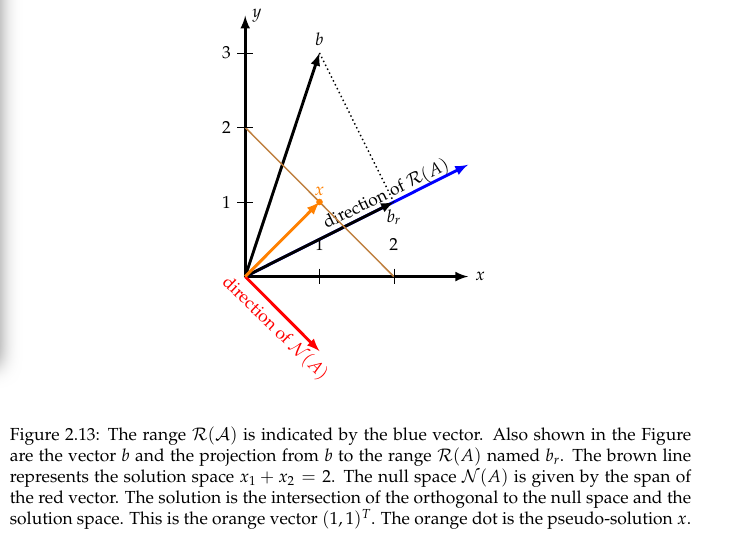

La pregunta clave es : como se calcula la pseudoinversa.

Le texto de Keener ilustra (por ahi 5 metodos distintos para calcular la pseudoinversa). Lo hemos hecho con las unhas. Es
decir. proyectomos $b$ a $\mathcal{R}(A)$  y lo llamamos $b_r$. Formamos el sistema $A x = b_r$ hallamos el espacio solucion y tomamos la perpendicular al espacio nulo $\mathcal{N}(A)$. Esto da $x$. Encontramos $A^+$ tal que $x= A^+ b$.

Hay un metodo sistematico para encontar la pseudoinversa que es SVD.

$$ A = U \Sigma V^*$$
donde

$$ \Sigma = \begin{pmatrix} \Sigma_r  & | & 0 \\
0 & | & 0 
\end{pmatrix} $$

Definimos
\begin{eqnarray*}
  \Sigma^+ = \begin{pmatrix}
    \sigma_1^{-1} & 0 & \cdots & \cdots & \cdots & \cdots & 0 \\
    0 &  \sigma_2^{-1} & \ddots & \ddots & \ddots & \ddots & \vdots \\
    \vdots & \ddots & \ddots & \ddots & \ddots & \ddots & \vdots \\
    \vdots & \ddots & \ddots & \sigma_r^{-1} & \ddots & \ddots & \vdots  \\
    \vdots & \ddots & \ddots & 0 &  0 & \ddots & \vdots  \\
    \vdots & \ddots & \ddots & \ddots &  \ddots & \ddots   & 0 \\
    \vdots & \ddots & \ddots & \ddots &  \ddots & \ddots  & 0 \\
    \vdots & \ddots & \ddots & \ddots  & \vdots & \vdots & \vdots \\
    0 & \cdots & \cdots & \cdots & \cdots & \cdots & 0 \\
  \end{pmatrix} \,.
\end{eqnarray*}

La matriz $\Sigma^+$ se construye de la siguiente forma:

* Se hace transpuesta de $\Sigma$
* Los $\sigma_j$ que no son 0 se invierten. Es decir, se convierten a $\sigma_j^{-1}$.
* Los demas elementos son todos 0.

La podemos definir con una ecuacion:
\begin{eqnarray}
  \sigma_{ij}^+ = 
  \left \{
    \begin{array}{cc}
      \delta_{ij} \sigma_i^{-1}  & i \le r \\
      0   & i > r \,.
    \end{array}
  \right .  %}
\end{eqnarray}

La pseudoinversa 
$$A^+ = V \Sigma^+ U^* $$

Conocida la pseudoinversa podemos calcular la pseudosolucion.

$$ x^+ = A^+ b = V \Sigma^+ U^* b $$

\begin{eqnarray}
X^+ &=& V \Sigma^+ U^*  b \\
&=& [\sigma_1^{-1} v_1 | \sigma_2^{-1} v_2 | \cdots | \sigma_r^{-1} v_r | 0_{r+1} | \cdots | 0_m ] U^* b \\
&=&[\sigma_1^{-1} v_1 | \sigma_2^{-1} v_2 | \cdots | \sigma_r^{-1} v_r | 0_{r+1} | \cdots | 0_m ] \begin{pmatrix}
 u_1^* b \\ u_2^* b \\ \vdots \\ u_m^* b\end{pmatrix} \\
 &=& \sum_{j=1}^r \frac{1}{\sigma_j} v_j (u_j^* b) \\
 &=& \sum_{j=1}^r \frac{(u_j^* b) v_j}{\sigma_j}  \quad \quad (3)
\end{eqnarray}

### Pseudo-inversa y regularizacion de Tikhonov.







La regularizacion mas comun es con $\Gamma = \sqrt{\lambda I}$.

Y vimos que la extension de las ecuaciones normales es:

$$ (A^* A + \lambda I) x = A^* b $$
para hallar $x$ necesitmos la inversa $A_{\lambda}^+=(A^* A + \lambda I)^{-1}$

Encontremosla usando SVD. $A = U \Sigma V^*$.

\begin{eqnarray}
A_{\lambda}^+ &=& (A^* A + \lambda I)^{-1} A^* \\
&=& [(V \Sigma^* U^*) (U \Sigma V^*) + \lambda I]^{-1} V \Sigma^* U^* \\
&=& [ V \Sigma^*  U^* U \Sigma V^* + \lambda V I V^*]^{-1} V \Sigma^* U^* \\
&=& [ V \Sigma^* \Sigma V^* + \lambda V I V^*]^{-1} V \Sigma^* U^* \\
&=&  [ V  ( \Sigma^* \Sigma  + \lambda I )  V^*]^{-1} V \Sigma^* U^* \\
&=& V (\Sigma^* \Sigma + \lambda I)^{-1} V^* V \Sigma^* U^* \\
&=&  V (\Sigma^* \Sigma + \lambda I)^{-1}  \Sigma^* U^* 
\end{eqnarray}

Llamemos

$$ F = (\Sigma^* \Sigma + \lambda I)^{-1} \Sigma^*$$
$F$ es diagonal con componentes

$$f_{ij} = \delta_{ij} \frac{\sigma_i}{\sigma_i^2 + \lambda} $$
Entonces $x_{\lambda}^+= A_{\lambda}^+ b =  V F U^* b$.

De la misma forma que mostramos (3) llegamos a

$$ x_{\lambda}^+ = \sum_{j=1}^r \frac{\sigma_j}{\sigma_j^2 + \lambda} (u_j^* b) v_j $$
comparando este resultado con (3) encontramos que

$$ \lim_{\lambda \to 0}  x_{\lambda}^+ = x^+$$

Conclusion: La pseudosolucion es un limite de la regularizacion de Tikhonov cuando $\lambda \to 0$.
